# Importing libraries

In [2]:
# Import necessary libraries and modules
import numpy as np               # For numerical operations, handling arrays and matrices
import pandas as pd              # For handling and manipulating structured data (e.g., CSV files, DataFrames)
import random                    # For generating random numbers (often used for shuffling data)
import tensorflow as tf           # TensorFlow library for machine learning and deep learning models
import matplotlib.pyplot as plt   # For visualizing data, training results, and evaluation plots
from sklearn.metrics import accuracy_score   # For evaluating model performance using accuracy metric
from tensorflow.keras.models import Sequential   # Sequential model from Keras for building neural networks
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D   # Layers for CNN model
from tensorflow.keras.optimizers import SGD   # Stochastic Gradient Descent (SGD) optimizer for training
from tensorflow.keras.utils import to_categorical   # Utility function for one-hot encoding of labels
from tensorflow.keras.datasets import mnist   # To load the MNIST dataset (handwritten digits)


# Loading and preparing the data

In [3]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # This function loads the MNIST dataset, splitting it into training and test sets

# X_train: Contains 60,000 images (28x28 pixels) for training
# y_train: Contains 60,000 labels corresponding to the images in X_train (digits 0-9)

In [4]:
print(X_train.shape)

(60000, 28, 28)


In [5]:
# Check the minimum and maximum pixel values of the first image in the training set (X_train[0])
min_pixel_value = X_train[0].min()  # Finds the minimum pixel value in the first image (28x28 pixels)
max_pixel_value = X_train[0].max()  # Finds the maximum pixel value in the first image (28x28 pixels)

# Print the results
print(f"Minimum pixel value: {min_pixel_value}")  # Prints the minimum pixel value of the first image
print(f"Maximum pixel value: {max_pixel_value}")  # Prints the maximum pixel value of the first image


(0, 255)

In [6]:
# Normalize the pixel values of X_train and X_test to the range [0, 1]
X_train = (X_train - 0.0) / (255.0 - 0.0)  # Normalize the training data (scaling pixel values from [0, 255] to [0, 1])
X_test = (X_test - 0.0) / (255.0 - 0.0)    # Normalize the test data (scaling pixel values from [0, 255] to [0, 1])

# Check the minimum and maximum pixel values of the first image in the normalized training set
min_pixel_value = X_train[0].min()  # Finds the minimum pixel value in the first image after normalization
max_pixel_value = X_train[0].max()  # Finds the maximum pixel value in the first image after normalization

# Print the results
print(f"Minimum pixel value after normalization: {min_pixel_value}")  # Prints the minimum pixel value
print(f"Maximum pixel value after normalization: {max_pixel_value}")  # Prints the maximum pixel value


(0.0, 1.0)

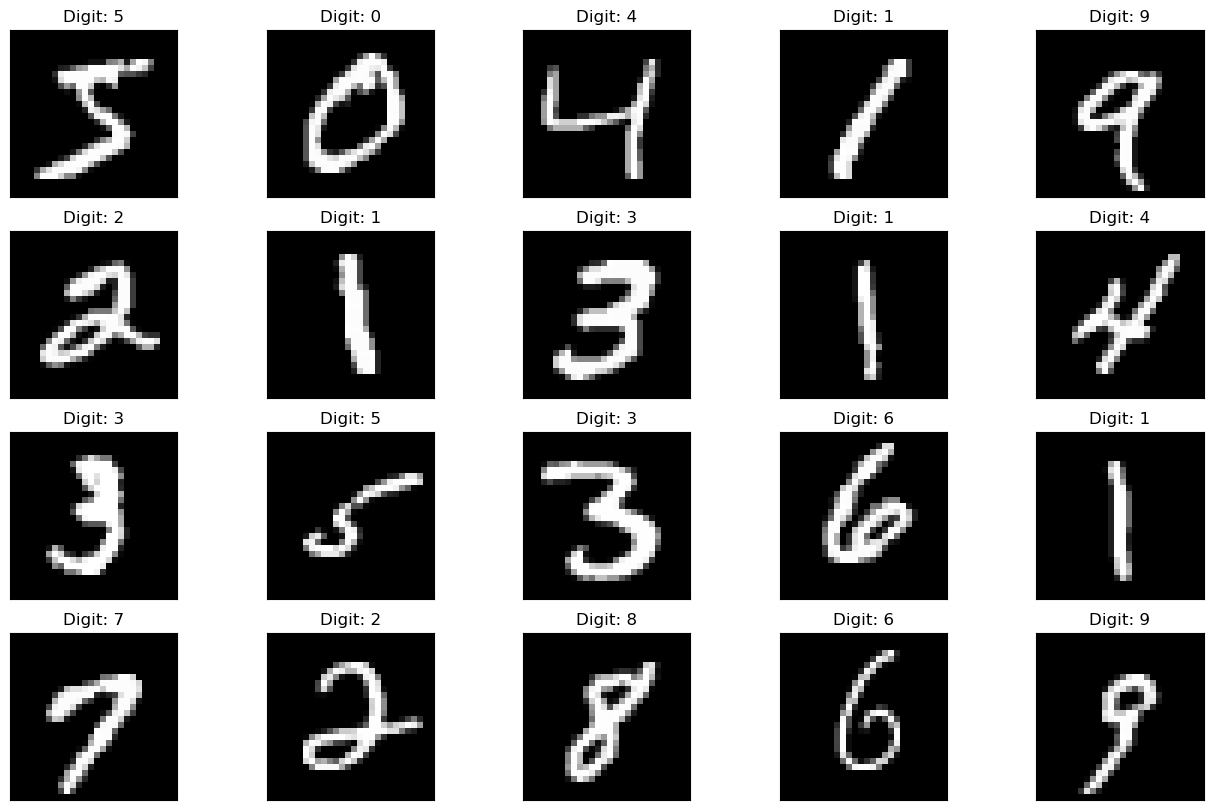

In [7]:
# Define a function to plot a digit image with its corresponding label (digit)
def plot_digit(image, digit, plt, i):
    # Create a subplot in a 4x5 grid and place the image at index (i+1) in the grid
    plt.subplot(4, 5, i + 1)
    
    # Display the image using a grayscale color map (cmap='gray')
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    
    # Set the title of the subplot to show the digit label
    plt.title(f"Digit: {digit}")
    
    # Hide the x and y axis ticks for better visualization
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks

# Create a figure with a larger size to fit 20 images in a 4x5 grid
plt.figure(figsize=(16, 10))

# Loop through the first 20 images in the training set (X_train) and plot them
for i in range(20):
    # Call the plot_digit function to display each image and its corresponding label
    plot_digit(X_train[i], y_train[i], plt, i)

# Display the plotted images
plt.show()


In [8]:
# Reshape the training and test datasets to add an extra dimension for the channel (grayscale)
X_train = X_train.reshape((X_train.shape + (1,)))  # Reshape X_train to have an extra dimension for channels (e.g., (60000, 28, 28, 1))
X_test = X_test.reshape((X_test.shape + (1,)))    # Reshape X_test similarly to have (10000, 28, 28, 1)

# Display the first 20 labels in the training set (y_train) to see what the digit labels are
print(y_train[0:20])  # Prints the first 20 labels (digits) in y_train


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

# Creating the Model

In [9]:
# Define a Convolutional Neural Network (CNN) model using the Sequential API
model = Sequential([

    # First convolutional layer: 32 filters, 3x3 kernel, ReLU activation function
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    # This layer applies 32 filters with a 3x3 kernel to the input image (28x28x1)
    # The ReLU activation function is applied to the output to introduce non-linearity
    # input_shape=(28, 28, 1) specifies the shape of each input image (28x28 pixels, 1 color channel)

    # MaxPooling layer: 2x2 pool size
    MaxPooling2D((2, 2)),
    # This layer reduces the spatial dimensions (height and width) by taking the maximum value in each 2x2 region
    # It reduces the size of the output from the previous convolutional layer, helping with computational efficiency

    # Flatten layer: Flatten the 2D matrix into a 1D vector
    Flatten(),
    # This layer converts the 2D feature maps from the previous layer into a 1D vector for the fully connected layers

    # Dense layer: Fully connected layer with 100 neurons and ReLU activation
    Dense(100, activation="relu"),
    # This fully connected layer has 100 neurons, with ReLU applied for non-linearity

    # Output layer: Dense layer with 10 neurons and Softmax activation
    Dense(10, activation="softmax")
    # The output layer has 10 neurons (one for each digit, 0-9)
    # The softmax activation function ensures that the output values are probabilities, summing to 1
    # Each neuron represents the probability of the input image belonging to a particular digit class (0-9)

])


In [10]:
# Define the optimizer with SGD (Stochastic Gradient Descent) with a learning rate and momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)
# SGD is the optimization algorithm used to update the model's weights during training.
# learning_rate=0.01 specifies the step size for each iteration.
# momentum=0.9 helps accelerate gradient descent by considering previous updates.

# Compile the model, specifying the optimizer, loss function, and evaluation metrics
model.compile(
    optimizer=optimizer,  # Use the SGD optimizer defined above
    loss="sparse_categorical_crossentropy",  # Loss function for multi-class classification without one-hot encoding
    metrics=["accuracy"]  # Track accuracy as an additional metric during training
)

# Display a summary of the model architecture
model.summary()
# model.summary() provides an overview of the model layers, including each layer's type, output shape, and number of parameters


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               540900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

# Train the Model

In [11]:
# Train the model on the training data
history = model.fit(
    X_train,             # Training images
    y_train,             # Training labels
    validation_data=(X_test, y_test),  # Validation data to check the model's performance on unseen data
    epochs=10            # Number of times the model will iterate over the training data
)


Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.2394 - accuracy: 0.9278 - val_loss: 0.0957 - val_accuracy: 0.9690
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0794 - accuracy: 0.9754 - val_loss: 0.0606 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0491 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0467 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0437 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0420 - val_accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0139 - accuracy: 0.9959 - val_loss: 0.0446 - val_ac

1/1 [==============================] - 0s 15ms/step


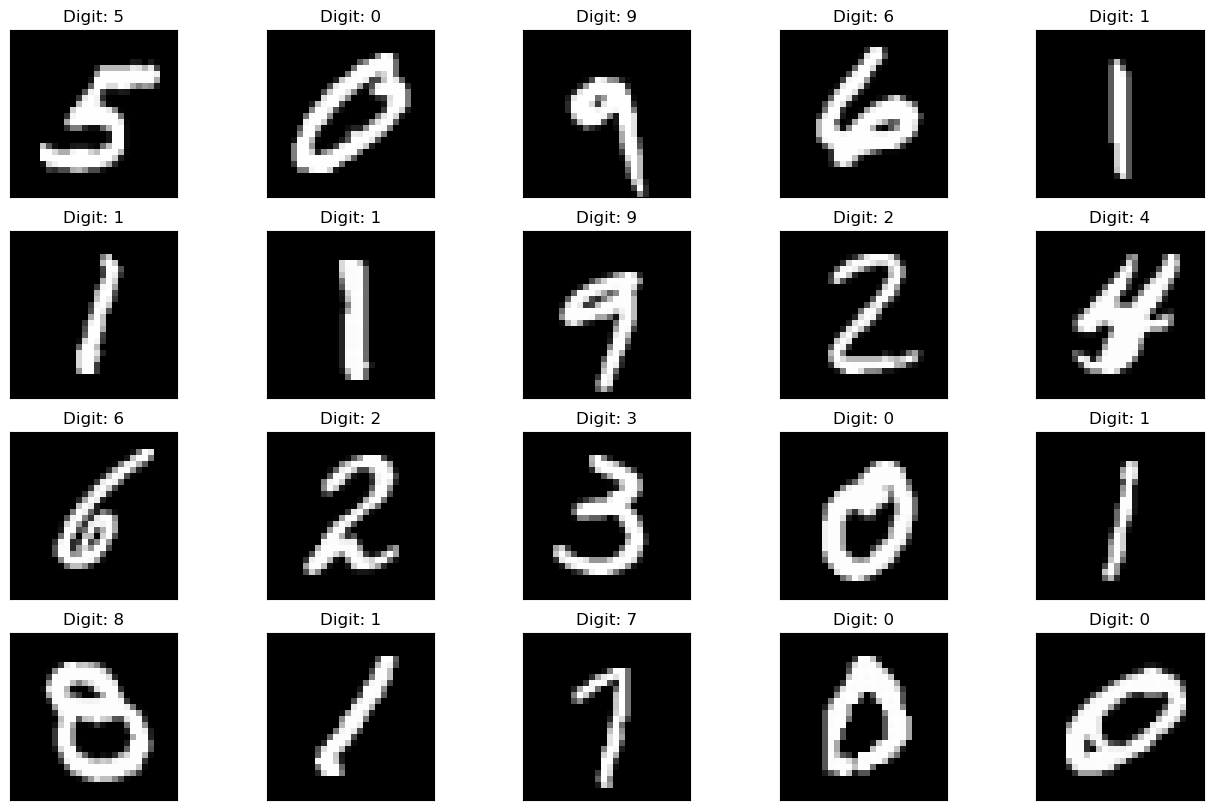

In [12]:
# Set up a figure to plot multiple images
plt.figure(figsize=(16, 10))

# Loop through to plot 20 images
for i in range(20):
    # Select a random image from the test set and remove the extra channel dimension
    image = random.choice(X_test).squeeze()  # .squeeze() removes the extra channel dimension, making the shape (28, 28)
    
    # Use the model to predict the digit in the selected image
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    # Reshape the image to (1, 28, 28, 1) for prediction since the model expects a 4D input (batch size, height, width, channels)
    # model.predict() outputs probabilities for each class; np.argmax() selects the class with the highest probability

    # Plot the image along with its predicted digit
    plot_digit(image, digit, plt, i)

# Show the plot with all images and predictions
plt.show()


In [13]:
# Generate predictions for the entire test set
predictions = np.argmax(model.predict(X_test), axis=-1)
# model.predict(X_test) returns an array of probabilities for each class for each test image
# np.argmax(..., axis=-1) finds the index of the maximum probability for each image, giving the predicted class labels

# Calculate the accuracy of the model's predictions on the test set
accuracy = accuracy_score(y_test, predictions)
# accuracy_score compares the true labels (y_test) with the predicted labels (predictions)
# and returns the proportion of correct predictions as a float

# Print the accuracy
print(f"Test set accuracy: {accuracy:.4f}")


313/313 [==============================] - 1s 3ms/step


0.9876

# Estimating the model's performance

In [14]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
# model.evaluate calculates the loss and metrics (like accuracy) on the test data.
# Setting verbose=0 suppresses the output during evaluation, providing only the final score.

# Print the test loss
print('Test loss:', score[0])  # Test Loss
# score[0] contains the loss value on the test set.

# Print the test accuracy
print('Test accuracy:', score[1])  # Test Accuracy
# score[1] contains the accuracy on the test set, as specified in model.compile().


Test loss: 0.04243645444512367
Test accuracy: 0.9876000285148621


In [15]:
# Retrieve accuracy and loss values from the training history
acc = history.history['accuracy']        # Training accuracy for each epoch
val_acc = history.history['val_accuracy']  # Validation accuracy for each epoch
loss = history.history['loss']           # Training loss for each epoch
val_loss = history.history['val_loss']    # Validation loss for each epoch

# Set the number of epochs and create a range for plotting
epochs = 10                              # Total number of epochs used in model training
epochs_range = range(epochs)             # Create a range object to use as the x-axis for plotting


<Figure size 640x480 with 0 Axes>

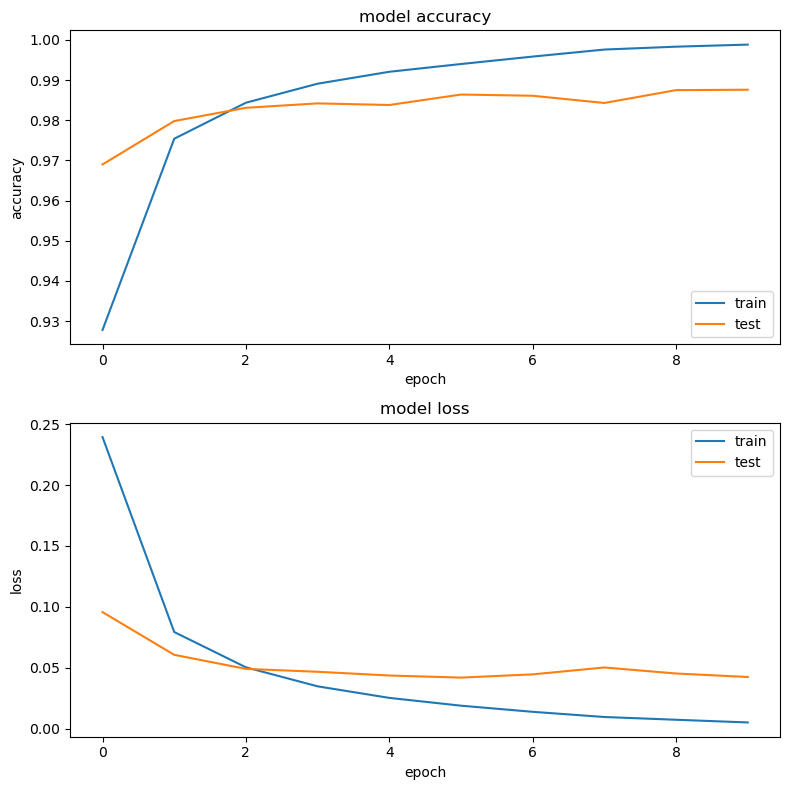

In [16]:
import os  # Importing the os library, though it is not used here; it could be for managing files in the current environment

# Set up the plot figure
fig = plt.figure()  # Initialize a new figure
plt.figure(figsize=(8, 8))  # Set the figure size to 8x8 inches

# Plot training and validation accuracy
plt.subplot(2, 1, 1)  # Create the first subplot in a 2x1 grid (2 rows, 1 column), starting with the top plot
plt.plot(epochs_range, acc, label='Training Accuracy')  # Plot training accuracy across epochs
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # Plot validation accuracy across epochs
plt.title('Model Accuracy')  # Title for the accuracy plot
plt.ylabel('Accuracy')  # Label for the y-axis
plt.xlabel('Epoch')  # Label for the x-axis
plt.legend(['Train', 'Test'], loc='lower right')  # Add legend to differentiate training and validation accuracy

# Plot training and validation loss
plt.subplot(2, 1, 2)  # Create the second subplot in the same 2x1 grid
plt.plot(epochs_range, loss, label='Training Loss')  # Plot training loss across epochs
plt.plot(epochs_range, val_loss, label='Validation Loss')  # Plot validation loss across epochs
plt.title('Model Loss')  # Title for the loss plot
plt.ylabel('Loss')  # Label for the y-axis
plt.xlabel('Epoch')  # Label for the x-axis
plt.legend(['Train', 'Test'], loc='upper right')  # Add legend to differentiate training and validation loss

# Adjust layout to prevent overlap
plt.tight_layout()  # Adjust subplot spacing to fit within the figure area without overlapping


In [17]:
# Save the model structure and weights to disk

# Serialize model architecture to JSON format
model_digit_json = model.to_json()  # Converts the model architecture to a JSON string
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)  # Saves the JSON string to a file named "model_digit.json"
# The JSON file can later be used to rebuild the model architecture without weights

# Serialize model weights to HDF5 format
model.save_weights("model_digit.h5")  # Saves the model's weights to a file named "model_digit.h5"
# The HDF5 file contains only the weights, which can be loaded into a compatible model architecture

print("Saved model to disk")  # Confirmation message that the model has been saved


Saved model to disk


In [ ]:
Here are some theoretical concepts from your code that an examiner might ask about:

1. **Pooling (MaxPooling2D)**:
   - **Definition**: Pooling layers reduce the spatial dimensions (height and width) of feature maps, which helps in reducing the number of parameters, computation, and controls overfitting.
   - **Max Pooling**: Extracts the maximum value from each patch of the feature map. It helps retain the most prominent features while discarding unnecessary information.
   - **Example Usage**: `MaxPooling2D((2, 2))` downsamples a feature map by taking the maximum value in each 2x2 patch.

2. **Grayscale Images**:
   - **Definition**: Grayscale images contain only shades of gray, varying from black to white, without color information. Each pixel is represented by a single intensity value, typically in the range of 0 to 255.
   - **Benefits**: Grayscale images are simpler to process and use less storage and computation compared to RGB images, as they have only one color channel.

3. **Epochs**:
   - **Definition**: An epoch is one complete pass through the entire training dataset. It is a key parameter in training neural networks, often repeated multiple times to improve accuracy.
   - **Considerations**: Too many epochs may cause overfitting, while too few can lead to underfitting.

4. **Activation Functions (ReLU, Softmax)**:
   - **ReLU (Rectified Linear Unit)**: An activation function that outputs zero for negative inputs and the input value for positive inputs, introducing non-linearity while being efficient in computation.
   - **Softmax**: Used in the output layer for multi-class classification. It converts logits into probabilities by assigning each class a probability between 0 and 1, summing up to 1.

5. **Normalization**:
   - **Purpose**: Scaling pixel values to a 0-1 range by dividing by 255 improves model training stability and speeds up convergence. Normalization helps to ensure consistent input ranges across datasets.

6. **Model Architecture (Sequential Model)**:
   - **Sequential Model**: A linear stack of layers in which each layer has exactly one input and one output, making it ideal for straightforward models.
   - **Example Layers**: `Conv2D`, `MaxPooling2D`, `Flatten`, and `Dense` layers are common in CNNs.

7. **Loss Functions**:
   - **Sparse Categorical Cross-Entropy**: A loss function used for multi-class classification where class labels are integer-encoded. It measures the difference between predicted and true class probabilities.

8. **Optimizer (SGD)**:
   - **SGD (Stochastic Gradient Descent)**: Optimizes model weights to minimize the loss function. It updates weights incrementally after each mini-batch. Adding **momentum** (e.g., 0.9) helps accelerate convergence.

9. **Model Evaluation**:
   - **Purpose**: After training, models are evaluated on test data to assess generalization. Metrics like loss and accuracy indicate the model's predictive performance on unseen data.

10. **Model Serialization (Saving and Loading Models)**:
    - **Model Serialization**: Saves model architecture and weights to disk, allowing models to be saved, shared, and reloaded without retraining.
    - **Formats**:
      - **JSON**: Saves the model’s structure.
      - **HDF5**: Stores the model’s weights in a portable format.

11. **`plt.subplot` and Visualization**:
    - **Definition**: `plt.subplot` is used to create a grid of plots, enabling side-by-side comparisons.
    - **Visualization**: Plotting accuracy and loss helps identify overfitting and underfitting by comparing training and validation trends across epochs.

These concepts cover key topics that often come up in exams on deep learning and model training workflows. Let me know if you’d like explanations on specific functions or processes!

Here are a few additional theoretical points that might be relevant:

12. **Convolutional Layers (Conv2D)**:
    - **Definition**: Convolutional layers apply filters (kernels) to input images to detect patterns like edges, textures, and shapes. Each filter moves across the image to produce a feature map, which is passed to deeper layers for learning complex patterns.
    - **Example Usage**: `Conv2D(32, (3, 3), activation="relu")` uses 32 filters of size 3x3 with a ReLU activation.

13. **Flattening**:
    - **Definition**: A `Flatten` layer reshapes multi-dimensional data (e.g., 2D images) into a 1D vector, preparing it for fully connected (Dense) layers.
    - **Purpose**: Essential for transitioning from convolutional layers (which work with spatial data) to dense layers (which process 1D data for classification).

14. **Batch Size**:
    - **Definition**: The number of samples processed before updating the model’s weights. For example, in `batch_size=32`, the model processes 32 samples before each weight update.
    - **Effect**: Smaller batch sizes offer more accurate gradient estimates but take longer to converge, while larger batches train faster but might generalize less well.

15. **Learning Rate**:
    - **Definition**: The learning rate controls how much to adjust weights with respect to the loss gradient. In `SGD(learning_rate=0.01)`, 0.01 defines the step size.
    - **Tuning**: Too high a learning rate can cause divergence; too low can make training slow.

16. **One-Hot Encoding vs Sparse Encoding**:
    - **Sparse Encoding**: Class labels are encoded as single integers (0 to 9 for digits in MNIST), used with `sparse_categorical_crossentropy`.
    - **One-Hot Encoding**: Converts labels into a binary matrix format (e.g., [0,1,0,0] for class 1), used with `categorical_crossentropy`.

17. **Overfitting and Underfitting**:
    - **Overfitting**: When the model performs well on training data but poorly on test data, often due to too many epochs or model complexity.
    - **Underfitting**: When the model performs poorly on both training and test data, usually due to insufficient model complexity or training time.

18. **Data Augmentation**:
    - **Definition**: A technique to artificially expand the training dataset by applying random transformations (rotations, zooms, flips) to images.
    - **Purpose**: Reduces overfitting and improves generalization by exposing the model to varied data.

19. **Confusion Matrix**:
    - **Definition**: A table that summarizes classification performance by showing the counts of true positives, false positives, true negatives, and false negatives.
    - **Purpose**: Helps visualize where the model makes errors, especially for multi-class classification.

20. **Model Checkpointing**:
    - **Definition**: A technique to save model weights at certain points during training (e.g., at the epoch with the highest validation accuracy).
    - **Purpose**: Ensures the best model version is saved, preventing the loss of progress due to unexpected interruptions.

These concepts are key to understanding how CNNs are trained, evaluated, and optimized for real-world applications. Let me know if you need more detail on any of these points!